In [1]:
import os
import sys
import numpy as np
import pandas as pd

# Load simulation source code
source_dir = "../src"
sys.path.insert(0, source_dir)
from simulations import run_simulation


In [2]:
### SET SIMULATION PARAMETERS ###
num_days = 100
x = 0.5  # Initial proportion of ordinary people
prop_infected = 0.001  # Initial proportion of infected
lambdas = np.arange(1, 4.2, 0.2)  # beta_misinformed = lambda * beta_ord

# Fixed based on results from previous analyses
beta = 0.3
rec_days = 4

# Result storage
totals = []  # Total infections

# Will store the progression of infections over time, indexed by lambda
infection_flows_ord = dict()
infection_flows_mis = dict()

print(lambdas)

[1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]


In [3]:
lambdas

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. ])

In [4]:
for lambduh in lambdas:
    # Run the simulation based on the input
    S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
        frac_ord=x,
        prop_infec=prop_infected,
        num_days=num_days,
        beta_ord=beta,
        recovery_days=rec_days,
        beta_mult=lambduh,
        w_homophily=False,
        alpha=None,
        mixed=False,
    )

    # Daily incidence
    infection_flows_ord[np.round(lambduh, 1)] = I_o
    infection_flows_mis[np.round(lambduh, 1)] = I_m

    # Total infected
    total_ord_inf = max(R_o)
    total_mis_inf = max(R_m)
    totals.append(
        {
            "total_ord_inf": total_ord_inf,
            "total_mis_inf": total_mis_inf,
            "lambda": lambduh,
            "diff": total_mis_inf - total_ord_inf,
            "total_inf": total_ord_inf + total_mis_inf,
        }
    )

In [5]:
infection_flows_ord.keys()

dict_keys([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0])

In [6]:
infection_flows_ord[4].max()

0.07831395841330127

In [7]:
np.round(infection_flows_ord[4],3)

array([0.   , 0.   , 0.   , 0.001, 0.001, 0.001, 0.002, 0.002, 0.003,
       0.005, 0.006, 0.009, 0.012, 0.016, 0.022, 0.028, 0.036, 0.045,
       0.054, 0.063, 0.071, 0.076, 0.078, 0.078, 0.075, 0.071, 0.065,
       0.059, 0.053, 0.046, 0.04 , 0.035, 0.03 , 0.026, 0.022, 0.019,
       0.016, 0.013, 0.011, 0.009, 0.008, 0.006, 0.005, 0.004, 0.004,
       0.003, 0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

In [8]:
import matplotlib.pyplot as plt

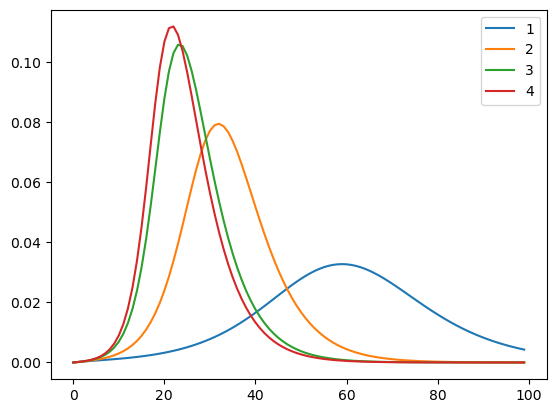

In [10]:

for key in range(1,5):
    plt.plot(range(len(infection_flows_ord[key])), infection_flows_ord[key], label = key)
    
plt.legend()

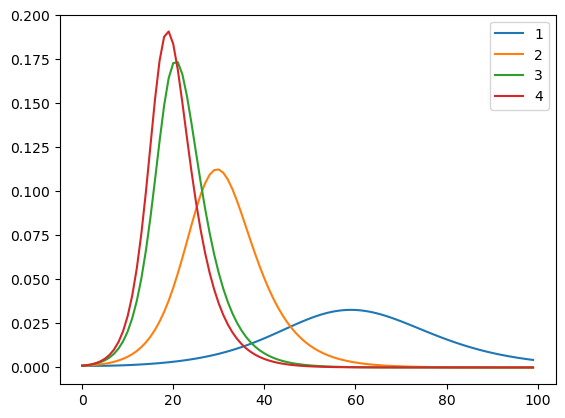

In [11]:

for key in range(1,5):
    plt.plot(range(len(infection_flows_mis[key])), infection_flows_mis[key], label = key)
    
plt.legend()

In [34]:
### Total proportion of the network that gets infected ###
totals_df = pd.DataFrame.from_records(totals)
totals_df["total_extra"] = totals_df["total_inf"] - totals_df["total_inf"].min()

In [35]:
totals_df

,total_ord_inf,total_mis_inf,lambda,diff,total_inf,total_extra
0,0.106748,0.107535,1.0,0.000787,0.214283,0.000000
1,0.191183,0.220227,1.2,0.029044,0.411410,0.197127
2,0.235351,0.295625,1.4,0.060273,0.530976,0.316692
3,0.258969,0.345562,1.6,0.086593,0.604531,0.390248
4,0.274053,0.381878,1.8,0.107825,0.655931,0.441647
5,0.284592,0.409213,2.0,0.124621,0.693805,0.479522
6,0.292271,0.430038,2.2,0.137767,0.722309,0.508025
7,0.298005,0.446004,2.4,0.147998,0.744009,0.529726
8,0.302364,0.458300,2.6,0.155936,0.760664,0.546381
9,0.305722,0.467804,2.8,0.162082,0.773526,0.559242


In [14]:
### Daily proportion of the network that gets infected ###
# ----- Combined subpopulations -----
combined_infections = pd.DataFrame(infection_flows_ord) + pd.DataFrame(
    infection_flows_mis
)
combined_infections = combined_infections.reset_index()
combined_infections = combined_infections.rename(columns={"index": "day"})
combined_infections.day = combined_infections.day + 1  # Days start on 1
combined_infections = combined_infections.melt(id_vars="day")
combined_infections.rename(columns={"variable": "lambda"}, inplace=True)
combined_infections["group"] = "combined"

# ----- Ordinary subpopulation -----
infections_ord = pd.DataFrame(infection_flows_ord).reset_index()
infections_ord = infections_ord.rename(columns={"index": "day"})
infections_ord.day = infections_ord.day + 1
infections_ord = infections_ord.melt(id_vars="day")
infections_ord.rename(columns={"variable": "lambda"}, inplace=True)
infections_ord["group"] = "ordinary"

# ----- Misinformed subpopulation -----
infections_mis = pd.DataFrame(infection_flows_mis).reset_index()
infections_mis = infections_mis.rename(columns={"index": "day"})
infections_mis.day = infections_mis.day + 1
infections_mis = infections_mis.melt(id_vars="day")
infections_mis.rename(columns={"variable": "lambda"}, inplace=True)
infections_mis["group"] = "misinformed"

In [20]:
infections_mis

,day,lambda,value,group
0,1,1.0,1.000000e-03,misinformed
1,2,1.0,9.497000e-04,misinformed
2,3,1.0,9.243357e-04,misinformed
3,4,1.0,9.203780e-04,misinformed
4,5,1.0,9.351421e-04,misinformed
...,...,...,...,...
1595,96,4.0,1.643710e-07,misinformed
1596,97,4.0,1.380071e-07,misinformed
1597,98,4.0,1.158976e-07,misinformed
1598,99,4.0,9.735083e-08,misinformed


In [21]:
infections_mis[infections_mis['lambda'] == 1].value.max()

0.032708282134048666

In [22]:
infection_flows_mis[1].max()

0.032708282134048666

In [23]:
# Combine them into one dataframe
by_day_results = pd.concat((infections_mis, infections_ord, combined_infections))

In [26]:
by_day_results.group.unique()

array(['misinformed', 'ordinary', 'combined'], dtype=object)

In [27]:
totals_df

,total_ord_inf,total_mis_inf,lambda,diff,total_inf,total_extra
0,0.283461,0.283894,1.0,0.000433,0.567354,0.000000
1,0.316970,0.350941,1.2,0.033971,0.667911,0.100557
2,0.334341,0.394537,1.4,0.060197,0.728878,0.161524
3,0.344936,0.424638,1.6,0.079702,0.769573,0.202219
4,0.351958,0.445911,1.8,0.093953,0.797869,0.230514
5,0.356824,0.461104,2.0,0.104280,0.817928,0.250573
6,0.360292,0.472021,2.2,0.111729,0.832313,0.264958
7,0.362815,0.479896,2.4,0.117081,0.842710,0.275356
8,0.364680,0.485589,2.6,0.120909,0.850268,0.282914
9,0.366077,0.489707,2.8,0.123629,0.855784,0.288430
